In [46]:
# Telco Customer Churn - Limpieza y Análisis Exploratorio de Datos
# Fecha: 13/06/2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

from os import path

file_path = '/content/drive/My Drive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path) # Leemos el archivo CSV y lo cargamos en un DataFrame llamado df

# Mostrar las primeras filas del archivo
print("Primeras filas:")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras 10 filas:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...            

In [47]:
# -------------------------
# 1. EXPLORACION INICIAL DE LOS DATOS
# -------------------------

# 1.1 Mostrar las últimas 5 filas
print("Últimas 5 filas:")
print(df.tail(5))

# 1.2 Información general del DataFrame
print("Información general:")
print(df.info())

# 1.3 Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df.describe(include='all'))


Últimas 5 filas:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         

In [48]:
# -------------------------
# 2. LIMPIEZA DE DATOS
# -------------------------

# 2.1 Verificar  y eliminacion de posibles duplicados
print(f"Duplicados antes de la verificación: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Duplicados después de la verificación: {df.duplicated().sum()}")

# 2.2 Verificacion tipo de datos
print("Tipos de datos presentes:")
print(df.dtypes)

# 2.3 Corregir tipo de dato de 'TotalCharges'
# Reemplazar espacios en blanco por NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convertir a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
print("Datos después de la conversión:")
print(df.dtypes)

2.4 # Posibles Valores faltantes
print("Valores faltantes por cada columna:")
print(df.isnull().sum())

# 2.4 Rellenar valores faltantes con la mediana (tipo numérico)
print("Valores despues de rellenar datos faltantes:")
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 2.5 Normalizar valores categóricos tipo 'No internet service' -> 'No'
cols_servicio = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in cols_servicio:
    df[col] = df[col].replace({'No internet service': 'No'})

df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

# Verificar que no queden valores nulos
print(df.isnull().sum())

# Verificar los tipos de datos
print(df.dtypes)


Duplicados antes de la verificación: 0
Duplicados después de la verificación: 0
Tipos de datos presentes:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Datos después de la conversión:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSe

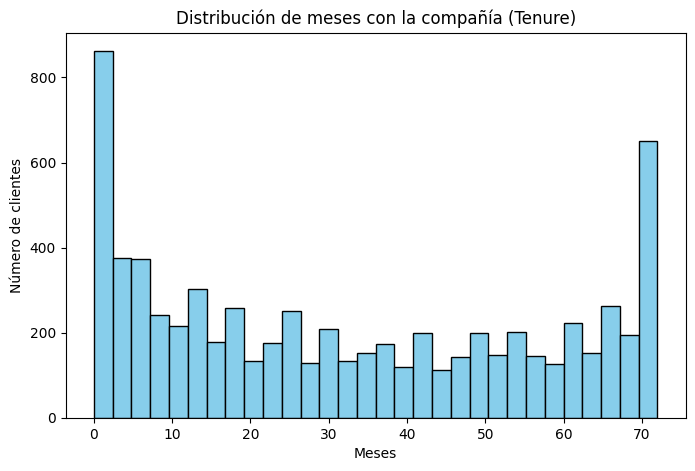

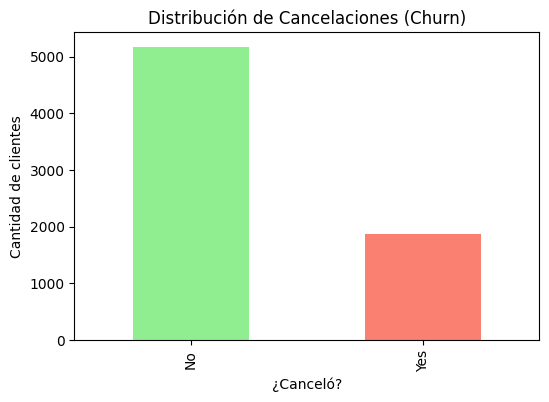

<Figure size 800x500 with 0 Axes>

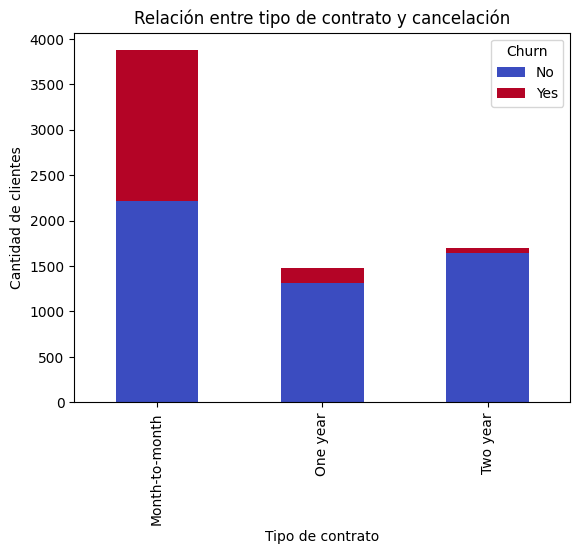

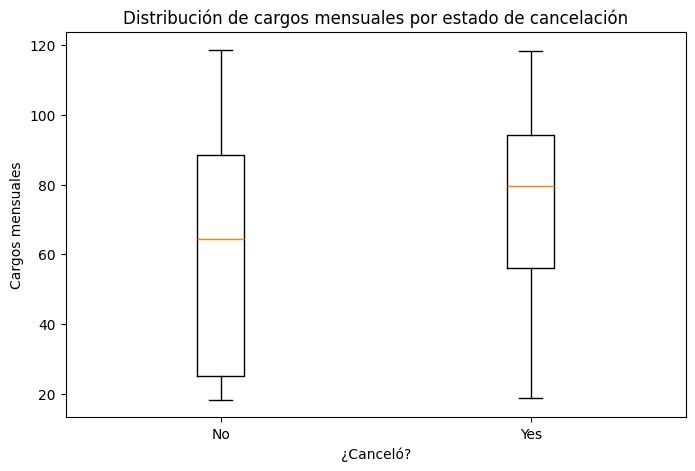

In [49]:
# -------------------------
# 3. ANÁLISIS EXPLORATORIO
# -------------------------

# 2.1 Visualización univariada 1: Distribución de Tenure
plt.figure(figsize=(8, 5))
plt.hist(df['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de meses con la compañía (Tenure)')
plt.xlabel('Meses')
plt.ylabel('Número de clientes')
plt.show()
# Interpretación: la mayoría de los clientes han estado menos de 20 meses.

# 2.2 Visualización univariada 2: Churn (clientes que cancelaron)
plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Distribución de Cancelaciones (Churn)')
plt.xlabel('¿Canceló?')
plt.ylabel('Cantidad de clientes')
plt.show()
# Interpretación: hay más clientes que NO han cancelado el servicio.

# 2.3 Visualización multivariada 1: Churn por tipo de contrato
plt.figure(figsize=(8, 5))
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Relación entre tipo de contrato y cancelación')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.show()
# Interpretación: los contratos mes a mes tienen una mayor tasa de cancelación.

# 2.4 Visualización multivariada 2: Ingresos mensuales vs cancelación
plt.figure(figsize=(8, 5))
plt.boxplot([df[df['Churn'] == 'No']['MonthlyCharges'], df[df['Churn'] == 'Yes']['MonthlyCharges']],
            tick_labels=['No', 'Yes'])
plt.title('Distribución de cargos mensuales por estado de cancelación')
plt.xlabel('¿Canceló?')
plt.ylabel('Cargos mensuales')
plt.show()
# Interpretación: los clientes que cancelan tienden a tener cargos mensuales más altos.